In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('Used_Bikes.csv')

In [55]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [56]:
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [58]:
data['bike_name'] = data['bike_name'].str.split().str.slice(0,3).str.join(" ")

print(data.city.unique())


['Ahmedabad' 'Delhi' 'Bangalore' 'Mumbai' 'Kalyan' 'Faridabad' 'Mettur'
 'Hyderabad' 'Kaithal' 'Gurgaon' 'Pune' 'Noida' 'Nashik' 'Kochi'
 'Allahabad' 'Samastipur' 'Nadiad' 'Lucknow' 'Jaipur' 'Karnal' 'Gorakhpur'
 'Vidisha' 'Hosur' 'Bagalkot' 'Baripara' 'Agra' 'Dharwad' 'Vadodara'
 'Jalandhar' 'Surat' 'Chennai' 'Navi Mumbai' 'Gandhidham' 'Visakhapatnam'
 'Thrissur' 'Kolkata' 'Ernakulam' 'Barasat' 'Ghaziabad' 'Bhubaneshwar'
 'Amritsar' 'Bhopal' 'Hamirpur(hp)' 'Kottayam' 'Arrah' 'Patiala'
 'Ranga Reddy' 'Mandi' 'Ludhiana' 'Mandya' 'Siliguri' 'Aurangabad'
 'Kanpur' 'Bhilwara' 'Meerut' 'Rewari' 'Ahmednagar' 'Wardha' 'Chandigarh'
 'Ranchi' 'Panvel' 'Thane' 'Jabalpur' 'Kota' 'Rohtak' 'Rajkot' 'Varanasi'
 'Pargana' 'Banka' 'Nagpur' 'Banki' 'Pali' 'Chhatarpur' 'Katihar' 'Mohali'
 'Rudrapur' 'Coimbatore' 'Jajpur' 'Mysore' 'Adoni' 'Bikaner' 'Malout'
 'Jammu' 'Rajnandgaon' 'Unnao' 'Godhara' 'Kolhapur' 'Satara' 'Siwan'
 'Dadra & Nagar Haveli' 'Bhiwani' 'Koppal' 'Nizamabad' 'Madurai' 'Ujjain'
 'Pala

In [59]:
data.replace({'owner':{'First Owner' : 0 , 'Second Owner':1,'Third Owner':2 , 'Fourth Owner Or More':3}},inplace=True)

no_city=list(data.city.unique())
no_brand=list(data.brand.unique())
def cc(x):
    return no_city.index(x)

def bc(x):
    return no_brand.index(x)

data['city_code']=data.city.apply(cc)

data['brand_code']=data.brand.apply(bc)


data.drop(['city','brand'],inplace=True,axis=1)
data.head()

,bike_name,price,kms_driven,owner,age,power,city_code,brand_code
0,TVS Star City,35000,17654,0,3,110,0,0
1,Royal Enfield Classic,119900,11000,0,4,350,1,1
2,Triumph Daytona 675R,600000,110,0,8,675,1,2
3,TVS Apache RTR,65000,16329,0,4,180,2,0
4,Yamaha FZ S,80000,10000,0,3,150,2,3


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


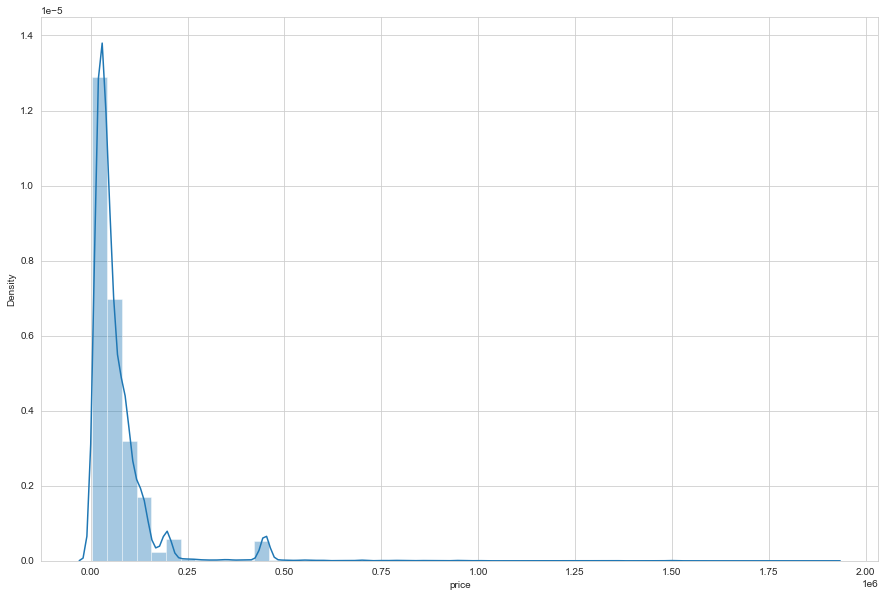

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.price)
plt.show()

In [61]:
#Correlations betn the attributes
data.corr()

,price,kms_driven,owner,age,power,city_code,brand_code
price,1.000000,-0.313955,-0.040164,-0.399133,0.862376,0.131509,0.394474
kms_driven,-0.313955,1.000000,-0.013661,0.484684,-0.264016,-0.014558,-0.029519
owner,-0.040164,-0.013661,1.000000,0.292523,0.044031,0.176990,-0.071885
age,-0.399133,0.484684,0.292523,1.000000,-0.337035,0.111732,-0.050883
power,0.862376,-0.264016,0.044031,-0.337035,1.000000,0.073572,0.213429
city_code,0.131509,-0.014558,0.176990,0.111732,0.073572,1.000000,-0.004459
brand_code,0.394474,-0.029519,-0.071885,-0.050883,0.213429,-0.004459,1.000000


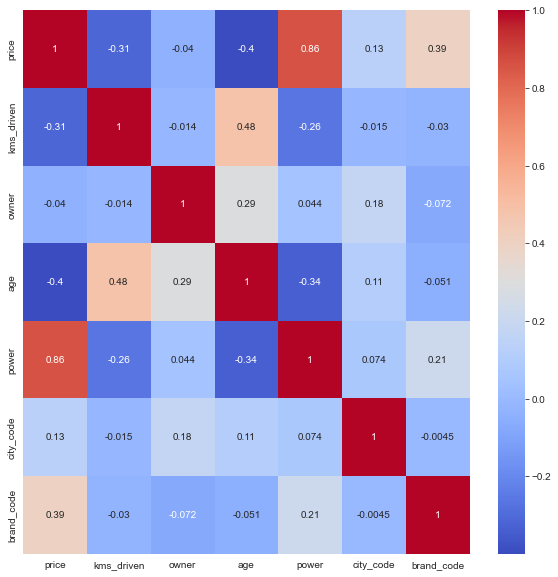

In [62]:
plt.figure(figsize=(10, 10))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [63]:
data.head()
# data.owner.value_counts()
data.to_csv('main_bike.csv')

Splitting Data into Train and Test

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [65]:
X,Y=data.drop(['bike_name','price'],axis=1) , data['price']

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

Model Trainning
Random Forest Regressor


In [67]:
randamForest = RandomForestRegressor()

In [68]:
randamForest.fit(X_train,Y_train)

RandomForestRegressor()

In [69]:
train_pred = randamForest.predict(X_train)
test_pred = randamForest.predict(X_test)

Model Evaluation

In [70]:
# R Squared Error
err_score=metrics.r2_score(Y_test,test_pred)
print("R Squ Error : ",err_score*100,"%")

R Squ Error :  96.59154657403512 %


Visulize actual price and predicted price

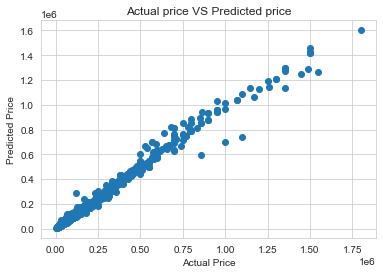

In [71]:
plt.scatter(Y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")
plt.savefig('graph.png')
plt.show()

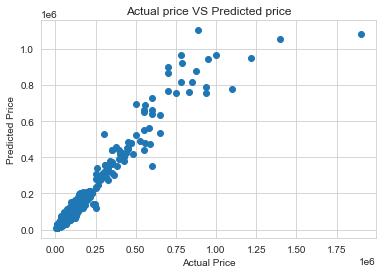

In [72]:
plt.scatter(Y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price VS Predicted price")
plt.show()

In [73]:
import pickle

In [74]:
pickle.dump(randamForest,open('RandomForestRegressor.pkl','wb'))

In [75]:
data.head()

,bike_name,price,kms_driven,owner,age,power,city_code,brand_code
0,TVS Star City,35000,17654,0,3,110,0,0
1,Royal Enfield Classic,119900,11000,0,4,350,1,1
2,Triumph Daytona 675R,600000,110,0,8,675,1,2
3,TVS Apache RTR,65000,16329,0,4,180,2,0
4,Yamaha FZ S,80000,10000,0,3,150,2,3


In [76]:
randamForest.predict(pd.DataFrame([[11000.0	,0	,4.0	,350.0,	1	,1]],columns=['kms_driven','owner','age','power','city_code','brand_code']))

array([116941.5])

In [77]:
randamForest.predict(pd.DataFrame([[10000.0,	0,	3,	150.0,	2,	3]],columns=['kms_driven','owner','age','power','city_code','brand_code']))

array([84770.])

In [78]:
data.power.unique()

array([ 110,  350,  675,  180,  150,  160,  100,  500,  250,  200,  125,
        302,  220,  390,  600,  900,  650,  223,  410,  135, 1100,  765,
        300, 1299,  750,  400, 1300,  821, 1198,  883,  959,  295,  320,
        310,  899, 1800,  535, 1130, 1000, 1200, 1050,  800, 1262, 1700,
        175,  865,  797,  796,  149,  850, 1090,  502,  107], dtype=int64)